In [2]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
img = pd.read_parquet(r'/content/drive/MyDrive/ComputerVision/img.parquet')

In [6]:
img_fns = glob(r'/content/drive/MyDrive/ComputerVision/OCR/*')

In [7]:
img_fns

['/content/drive/MyDrive/ComputerVision/OCR/00068a9d975dcc8a.jpg',
 '/content/drive/MyDrive/ComputerVision/OCR/000209d575f3aa4f.jpg',
 '/content/drive/MyDrive/ComputerVision/OCR/0006dc0977056410.jpg',
 '/content/drive/MyDrive/ComputerVision/OCR/0007b54189a67423.jpg',
 '/content/drive/MyDrive/ComputerVision/OCR/0007f2c11800286e.jpg']

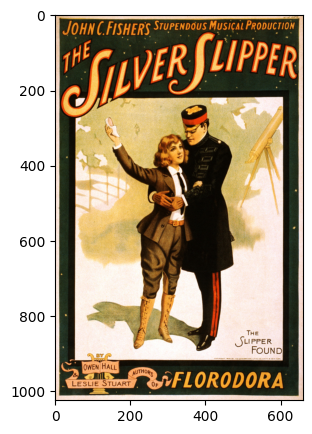

In [18]:
img_id = img_fns[0].split('/')[-1].split('.')[0]
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(plt.imread(img_fns[0]))
plt.show()

In [14]:
# !pip install easyocr

In [15]:
import easyocr

In [19]:
reader = easyocr.Reader(['en'], gpu=True)
results = reader.readtext(img_fns[0])
results

[([[12, 8], [644, 8], [644, 62], [12, 62]],
  'JoHN ( FISHERS STUPENDoUs MUSicaL PRoduction',
  0.27760011880099045),
 ([[397, 45], [659, 45], [659, 183], [397, 183]],
  'LIPPER ',
  0.47440932747252135),
 ([[507, 835], [543, 835], [543, 855], [507, 855]], 'The', 0.3932765237103934),
 ([[478, 852], [580, 852], [580, 884], [478, 884]],
  'SLIPPER',
  0.6581420876998537),
 ([[518, 878], [608, 878], [608, 908], [518, 908]],
  'FOUND',
  0.9817830523489116),
 ([[72, 920], [169, 920], [169, 949], [72, 949]],
  'OWENHALL',
  0.702640313056296),
 ([[201, 936], [266, 936], [266, 964], [201, 964]],
  'AuThORS',
  0.20267675435754295),
 ([[40, 968], [204, 968], [204, 992], [40, 992]],
  'LESLIE STUART',
  0.9410495009160796),
 ([[276, 938], [615, 938], [615, 1006], [276, 1006]],
  'SFLORODORA',
  0.4851981398164593),
 ([[-5.882901373576604, 108.1756479396351],
   [91.44818753896239, 47.90820201449978],
   [122.8829013735766, 104.8243520603649],
   [24.551812461037613, 166.09179798550022]],
  'TH

In [20]:
pd.DataFrame(results, columns=['bbox', 'text', 'conf'])

,bbox,text,conf
0,"[[12, 8], [644, 8], [644, 62], [12, 62]]",JoHN ( FISHERS STUPENDoUs MUSicaL PRoduction,0.277600
1,"[[397, 45], [659, 45], [659, 183], [397, 183]]",LIPPER,0.474409
2,"[[507, 835], [543, 835], [543, 855], [507, 855]]",The,0.393277
3,"[[478, 852], [580, 852], [580, 884], [478, 884]]",SLIPPER,0.658142
4,"[[518, 878], [608, 878], [608, 908], [518, 908]]",FOUND,0.981783
5,"[[72, 920], [169, 920], [169, 949], [72, 949]]",OWENHALL,0.702640
6,"[[201, 936], [266, 936], [266, 964], [201, 964]]",AuThORS,0.202677
7,"[[40, 968], [204, 968], [204, 992], [40, 992]]",LESLIE STUART,0.941050
8,"[[276, 938], [615, 938], [615, 1006], [276, 10...",SFLORODORA,0.485198
9,"[[-5.882901373576604, 108.1756479396351], [91....",THE,0.950321


In [21]:
# !pip install keras_ocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.9 MB/s eta 0:00:00


In [22]:
import keras_ocr

In [23]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [26]:
results1 = pipeline.recognize([img_fns[0]])

1/1 [==============================] - 0s 71ms/step


In [28]:
pd.DataFrame(results1[0], columns=['text', 'bbox'])

,text,bbox
0,stupendous,"[[263.22937, 13.604012], [408.52374, 18.109264..."
1,musical,"[[410.0, 14.0], [507.0, 14.0], [507.0, 42.0], ..."
2,production,"[[507.4335, 13.4287405], [641.58435, 18.05463]..."
3,john,"[[21.705368, 13.071055], [110.01039, 16.750431..."
4,cefishers,"[[110.2364, 15.742967], [258.373, 17.772232], ..."
5,clipper,"[[381.82034, 52.67822], [655.78503, 80.958435]..."
6,the,"[[0.55816555, 117.143555], [88.7689, 57.77094]..."
7,silver,"[[7.5138454, 135.23961], [346.0865, 46.97356],..."
8,the,"[[511.22766, 837.269], [544.99316, 840.0828], ..."
9,slipper,"[[480.0, 854.0], [579.0, 854.0], [579.0, 883.0..."


<Axes: >

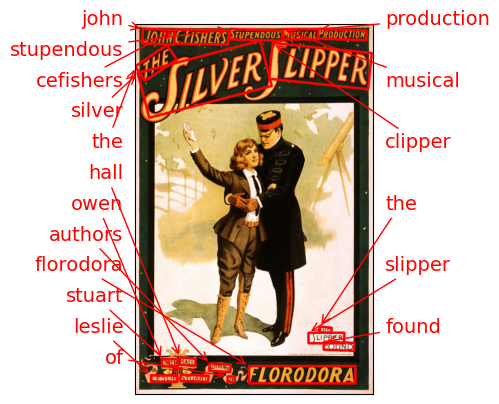

In [30]:
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[0]), results1[0])

In [32]:
reader = easyocr.Reader(['en'], gpu=True)

dfs = []
for img in tqdm(img_fns):
  result = reader.readtext(img)
  img_id = img.split('/')[-1].split('.')[0]
  img_df = pd.DataFrame(result, columns=['bbox', 'text', 'conf'])
  img_df['img_id'] = img_id
  dfs.append(img_df)

easyocr_df = pd.concat(dfs)
easyocr_df

  0%|          | 0/5 [00:00<?, ?it/s]

,bbox,text,conf,img_id
0,"[[12, 8], [644, 8], [644, 62], [12, 62]]",JoHN ( FISHERS STUPENDoUs MUSicaL PRoduction,0.277600,00068a9d975dcc8a
1,"[[397, 45], [659, 45], [659, 183], [397, 183]]",LIPPER,0.474409,00068a9d975dcc8a
2,"[[507, 835], [543, 835], [543, 855], [507, 855]]",The,0.393277,00068a9d975dcc8a
3,"[[478, 852], [580, 852], [580, 884], [478, 884]]",SLIPPER,0.658142,00068a9d975dcc8a
4,"[[518, 878], [608, 878], [608, 908], [518, 908]]",FOUND,0.981783,00068a9d975dcc8a
...,...,...,...,...
20,"[[652.3358994113244, 341.5038491169865], [772....",garantita.,0.994918,0007f2c11800286e
21,"[[532.0794468010066, 352.6953361612079], [632....",Keontrollata,0.140113,0007f2c11800286e
22,"[[531.8800042399873, 380.60800678397965], [677...",labottigliato,0.518932,0007f2c11800286e
23,"[[531.3358994113244, 419.5038491169865], [578....",Trine,0.040905,0007f2c11800286e


In [36]:
%%time

pipeline = keras_ocr.pipeline.Pipeline()

dfs = []
for img in tqdm(img_fns):
  result = pipeline.recognize([img])
  img_id = img.split('/')[-1].split('.')[0]
  img_df = pd.DataFrame(result[0], columns=['text', 'bbox'])
  img_df['img_id'] = img_id
  dfs.append(img_df)

keras_df = pd.concat(dfs)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 5s 5s/step
CPU times: user 2min 21s, sys: 2.06 s, total: 2min 23s
Wall time: 2min 47s


In [49]:
def plot_compare(img_fn, easyocr_df, keras_df):
  img_id = img_fn.split('/')[-1].split('.')[0]
  fig, ax = plt.subplots(1,2,figsize=(10,10))

  easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
  easy_results = [(x[0], np.array(x[1])) for x in easy_results]
  keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                  easy_results, ax=ax[0])
  ax[0].set_title('easyocr results', fontsize=20)

  keras_results = keras_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
  keras_results = [(x[0], np.array(x[1])) for x in keras_results]
  keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                  keras_results, ax=ax[1])
  ax[1].set_title('kerasocr results', fontsize=20)

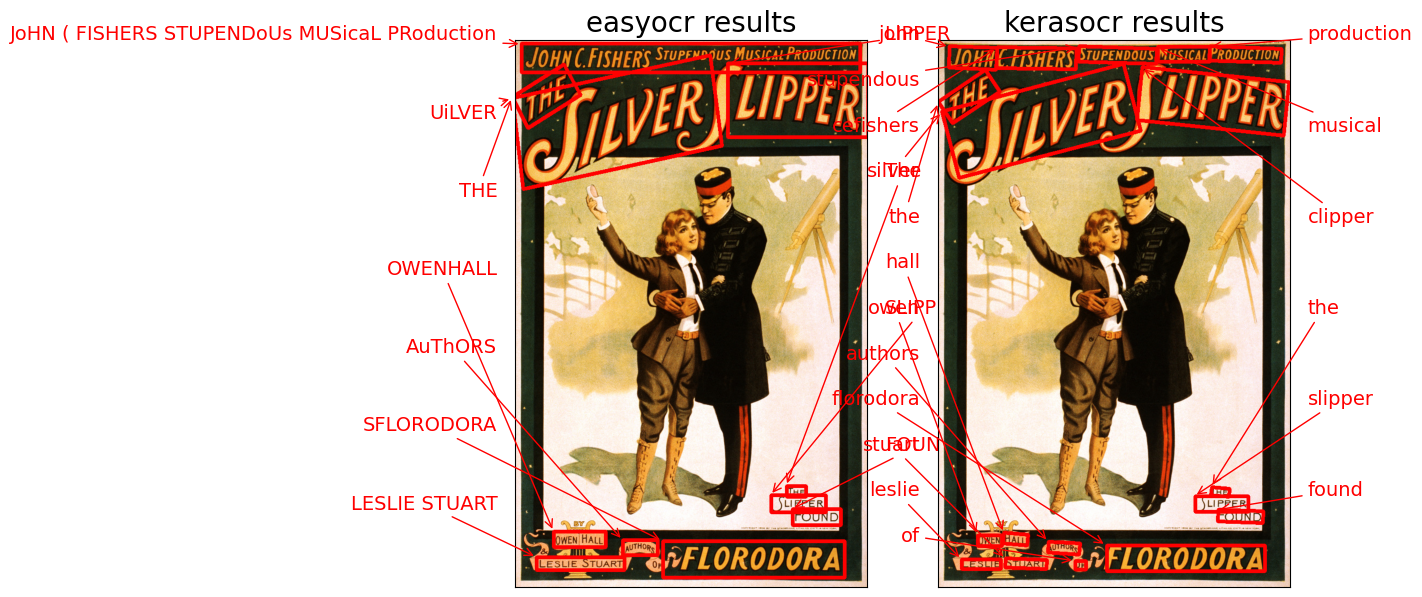

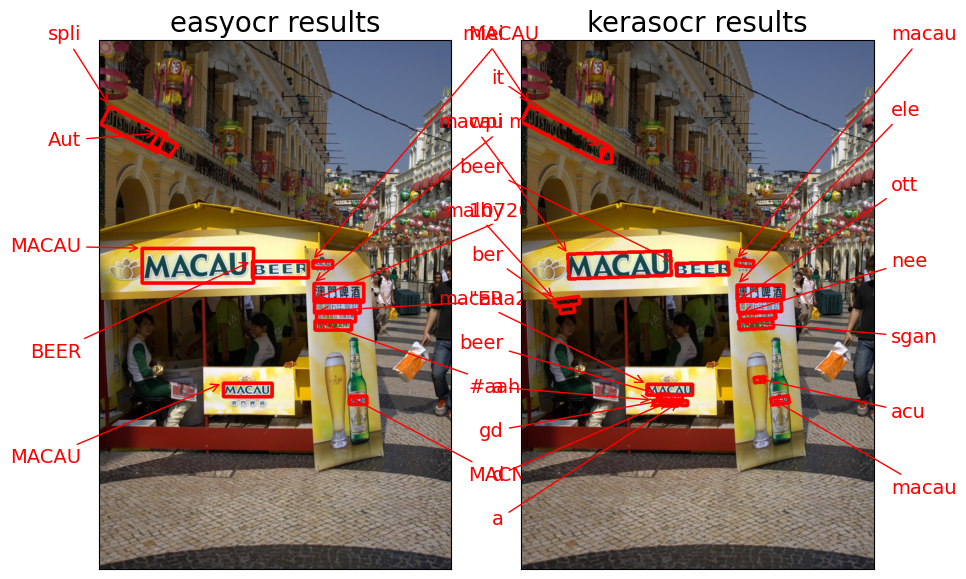

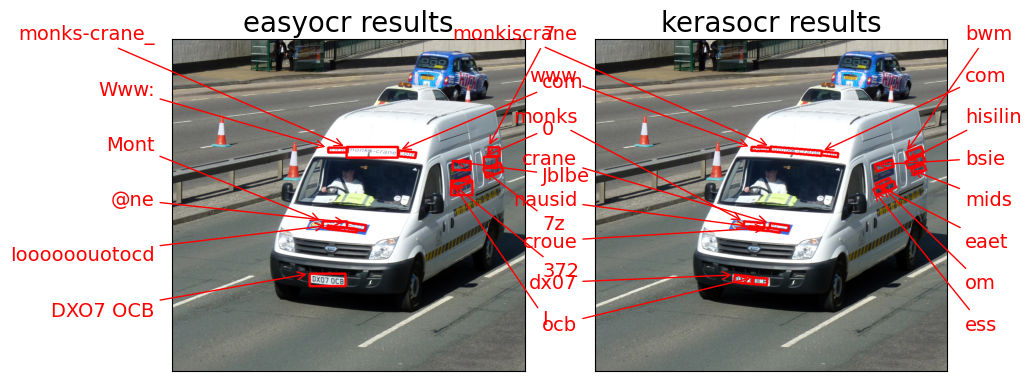

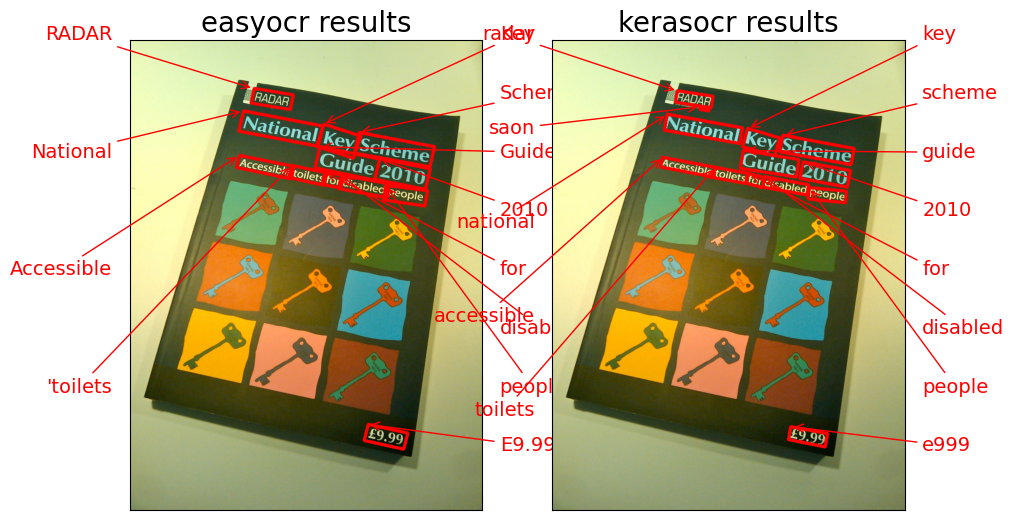

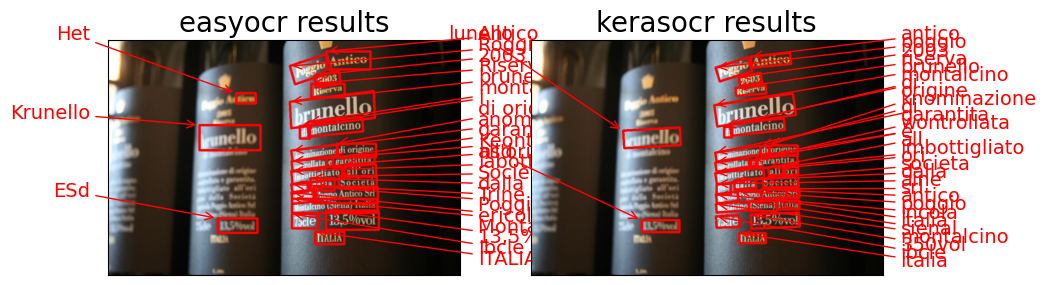

In [50]:
for img_fn in img_fns:
  plot_compare(img_fn, easyocr_df, keras_df)